In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from lazypredict.Supervised import LazyRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [171]:
diamonds = pd.read_csv('./data/diamondsql.csv')
#diamonds['volume'] = (4/3) * np.pi * diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds['length_width_ratio'] = diamonds['x'] / diamonds['y']
diamonds['width_depth_ratio'] = diamonds['y'] / diamonds['z']
diamonds

,index_id,price,city_id,carat,city_id.1,city,index_id.1,cut_id,color_id,clarity_id,...,color_id.1,color,index_id.2,depth,table,x,y,z,length_width_ratio,width_depth_ratio
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.40,58.00,6.83,6.79,4.25,1.01,1.60
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.00,57.00,4.35,4.38,2.75,0.99,1.59
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.50,55.00,5.62,5.53,3.65,1.02,1.52
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.80,56.00,4.68,4.72,3.00,0.99,1.57
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.50,59.00,6.55,6.51,3.95,1.01,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.70,57.00,7.10,7.04,4.43,1.01,1.59
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,Madrid,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.10,60.00,8.31,8.25,4.73,1.01,1.74
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01,89c7286890f7347ab235234e74d4

In [172]:
diamonds.columns

Index(['index_id', 'price', 'city_id', 'carat', 'city_id.1', 'city',
       'index_id.1', 'cut_id', 'color_id', 'clarity_id', 'cut_id.1', 'cut',
       'clarity_id.1', 'clarity', 'color_id.1', 'color', 'index_id.2', 'depth',
       'table', 'x', 'y', 'z', 'length_width_ratio', 'width_depth_ratio'],
      dtype='object')

In [173]:
diamonds = diamonds.drop(['index_id', 'city_id', 'city_id.1','index_id.1','cut_id', 'color_id', 'clarity_id', 'cut_id.1', 'clarity_id.1', 'color_id.1', 'index_id.2'], axis = 1)

In [174]:
diamonds.head()

,price,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio
0,4268,1.21,Dubai,Premium,VS2,J,62.40,58.00,6.83,6.79,4.25,1.01,1.60
1,505,0.32,Kimberly,Very Good,VS2,H,63.00,57.00,4.35,4.38,2.75,0.99,1.59
2,2686,0.71,Las Vegas,Fair,VS1,G,65.50,55.00,5.62,5.53,3.65,1.02,1.52
3,738,0.41,Kimberly,Good,SI1,D,63.80,56.00,4.68,4.72,3.00,0.99,1.57
4,4882,1.02,Dubai,Ideal,SI1,G,60.50,59.00,6.55,6.51,3.95,1.01,1.65


In [175]:
label_encoder = LabelEncoder()

In [176]:
columns_to_encode = ['city','cut','clarity','color']

In [177]:
diamonds_encoded = diamonds.copy()  # Hacemos una copia del DataFrame original para no modificarlo directamente
for column in columns_to_encode:
    diamonds_encoded[column] = label_encoder.fit_transform(diamonds[column])

In [178]:
diamonds_encoded.head()

,price,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio
0,4268,1.21,2,3,5,6,62.40,58.00,6.83,6.79,4.25,1.01,1.60
1,505,0.32,3,4,5,4,63.00,57.00,4.35,4.38,2.75,0.99,1.59
2,2686,0.71,4,0,4,3,65.50,55.00,5.62,5.53,3.65,1.02,1.52
3,738,0.41,3,1,2,0,63.80,56.00,4.68,4.72,3.00,0.99,1.57
4,4882,1.02,2,2,2,3,60.50,59.00,6.55,6.51,3.95,1.01,1.65


In [179]:
list_correlacion = diamonds_encoded.columns.tolist()

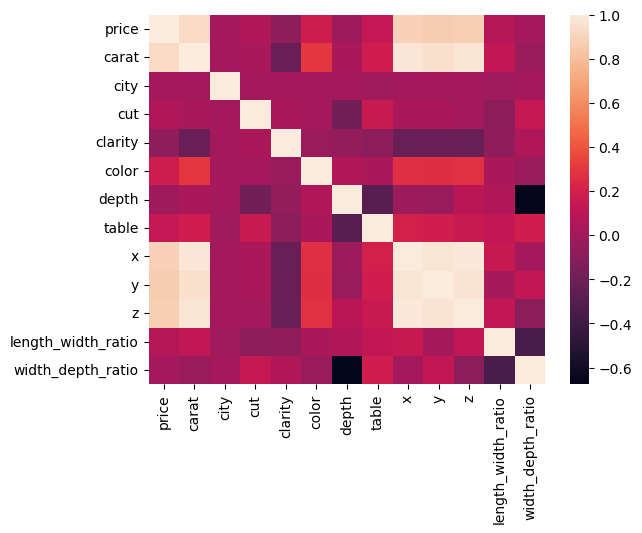

In [180]:
df_correlacion = diamonds_encoded[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

In [181]:
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

In [182]:
X[np.isinf(X)] = np.nan
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X = np.log1p(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (32364, 12), X_test: (8091, 12), y_train: (32364,), y_test: (8091,)


In [60]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [32:39<02:18, 12.62s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [34:58<00:00, 49.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 32364, number of used features: 12
[LightGBM] [Info] Start training from score 3927.895532


In [61]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.98,0.98,537.49,0.22
ExtraTreesRegressor,0.98,0.98,537.54,23.28
HistGradientBoostingRegressor,0.98,0.98,544.94,0.79
RandomForestRegressor,0.98,0.98,565.35,54.56
XGBRegressor,0.98,0.98,565.67,0.43
BaggingRegressor,0.98,0.98,592.30,5.03
GradientBoostingRegressor,0.97,0.97,661.82,7.00
DecisionTreeRegressor,0.96,0.96,767.74,0.68
ExtraTreeRegressor,0.96,0.96,794.15,0.25


In [184]:
model_xgb = LGBMRegressor(random_state=42)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 32364, number of used features: 12
[LightGBM] [Info] Start training from score 3927.895532


In [185]:
mean_squared_error(y_test, y_pred)


286541.27192005847

In [186]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

535.2954996261957

In [187]:
diamonds_test = pd.read_csv('./data/diamonds_test.csv')
#diamonds_test['volume'] = (4/3) * np.pi * diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z']
diamonds_test['length_width_ratio'] = diamonds_test['x'] / diamonds_test['y']
diamonds_test['width_depth_ratio'] = diamonds_test['y'] / diamonds_test['z']
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city,length_width_ratio,width_depth_ratio
0,0,0.79,Very Good,F,SI1,62.70,60.00,5.82,5.89,3.67,Amsterdam,0.99,1.60
1,1,1.20,Ideal,J,VS1,61.00,57.00,6.81,6.89,4.18,Surat,0.99,1.65
2,2,1.57,Premium,H,SI1,62.20,61.00,7.38,7.32,4.57,Kimberly,1.01,1.60
3,3,0.90,Very Good,F,SI1,63.80,54.00,6.09,6.13,3.90,Kimberly,0.99,1.57
4,4,0.50,Very Good,F,VS1,62.90,58.00,5.05,5.09,3.19,Amsterdam,0.99,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.90,56.00,5.35,5.32,3.30,Amsterdam,1.01,1.61
13481,13481,0.71,Ideal,I,VS2,62.20,55.00,5.71,5.73,3.56,New York City,1.00,1.61
13482,13482,0.70,Ideal,F,VS1,61.60,55.00,5.75,5.71,3.53,Tel Aviv,1.01,1.62
13483,13483,0.70,Very Good,F,SI2,58.80,57.00,5.85,5.89,3.45,Surat,0.99,1.71


In [ ]:
columns_to_encode = ['city','cut','clarity','color']

In [163]:
diamonds_encoded_test = diamonds_test.copy()  # Hacemos una copia del DataFrame original para no modificarlo directamente
for column in columns_to_encode:
    diamonds_encoded_test[column] = label_encoder.fit_transform(diamonds_test[column])

In [164]:
orden = ['carat', 'city', 'cut', 'clarity', 'color', 'depth', 'table', 'x', 'y', 'z', 'length_width_ratio', 'width_depth_ratio']
diamonds_encoded_test = diamonds_encoded_test[orden]
diamonds_encoded_test

,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio
0,0.79,0,4,2,2,62.70,60.00,5.82,5.89,3.67,0.99,1.60
1,1.20,10,2,4,6,61.00,57.00,6.81,6.89,4.18,0.99,1.65
2,1.57,3,3,2,4,62.20,61.00,7.38,7.32,4.57,1.01,1.60
3,0.90,3,4,2,2,63.80,54.00,6.09,6.13,3.90,0.99,1.57
4,0.50,0,4,4,2,62.90,58.00,5.05,5.09,3.19,0.99,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,0,2,2,1,61.90,56.00,5.35,5.32,3.30,1.01,1.61
13481,0.71,8,2,5,5,62.20,55.00,5.71,5.73,3.56,1.00,1.61
13482,0.70,11,2,4,2,61.60,55.00,5.75,5.71,3.53,1.01,1.62
13483,0.70,10,4,3,2,58.80,57.00,5.85,5.89,3.45,0.99,1.71


In [165]:
#X_prueba = diamonds_encoded_test.drop('id', axis=1)
X_prueba = diamonds_encoded_test

In [166]:
y_prueba = model_xgb.predict(X_prueba)

[LightGBM] [Warning] Unknown parameter: ramndom_state


In [139]:
y_prueba


array([12878.69623414, 13116.81972302, 13576.57146975, ...,
       12575.48461445, 12575.48461445,  8969.97326095])

In [140]:
solution = []
for i, value in enumerate(y_prueba):
    solution.append((i,value))
    

In [141]:
solution_df = pd.DataFrame(solution)


In [142]:
solution_df.columns = ['id', 'price']

In [143]:
solution_df['price'].to_csv('solution.csv')